# Anticipez les besoins en consommation de bâtiments

## Partie 2:    Modélisation target  'SiteEnergyUseWN(kBtu)' 

#### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler,RobustScaler, OneHotEncoder,QuantileTransformer, FunctionTransformer, RobustScaler
from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2,f_classif, SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold, cross_validate, ShuffleSplit, StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error as mse, classification_report
from sklearn import linear_model
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
import datetime
from datetime import datetime
from sklearn.svm import SVR
import math
import xgboost
from xgboost import XGBRegressor
import shap
import warnings
warnings.filterwarnings('ignore')


#### Chargement jeu de données

In [2]:
#chargement du dataset néttoyé du notebook 1
df=pd.read_csv('data_clean.csv')
df.head()

,BuildingAge,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,...,SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Surface,energytype_count
0,89.0,NonResidential,Hotel/Senior Care/Housing,DOWNTOWN,1.0,12.0,88434.0,0.0,88434.0,Hotel/Senior Care/Housing,...,7456910.0,84.300003,249.98,2.83,60.0,2003882.00,3946027.0,1276453.0,1061208.0,3
1,90.0,NonResidential,Hotel/Senior Care/Housing,DOWNTOWN,1.0,10.0,61320.0,0.0,61320.0,Hotel/Senior Care/Housing,...,6946800.5,113.300003,286.43,4.67,56.0,2214446.25,2768924.0,1811213.0,613200.0,3
2,17.0,Nonresidential COS,Other,DOWNTOWN,1.0,2.0,97288.0,37198.0,60090.0,Police Station,...,12581712.0,141.600006,301.81,3.10,NaN,0.00,7371434.0,4715182.0,120180.0,2
3,90.0,NonResidential,Hotel/Senior Care/Housing,DOWNTOWN,1.0,11.0,83008.0,0.0,83008.0,Hotel/Senior Care/Housing,...,6062767.5,74.500000,176.14,2.12,27.0,0.00,2811215.0,2947580.0,913088.0,2
4,90.0,NonResidential,Other,DOWNTOWN,1.0,8.0,102761.0,0.0,102761.0,Leisure,...,7067881.5,68.800003,221.51,2.16,NaN,2276286.50,3636655.0,385189.0,822088.0,3


In [3]:
df.describe()

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),Surface,energytype_count
count,1098.000000,1098.000000,1098.000000,1.098000e+03,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1.098000e+03,1098.000000,1098.000000,1098.000000,689.000000,1.098000e+03,1.098000e+03,1.098000e+03,1.098000e+03,1098.000000
mean,56.705829,1.040984,3.408925,7.916063e+04,10623.863388,68536.764117,62515.361566,17264.871491,5424.779873,4.523385e+06,69.287432,88.046849,1.382049,62.346880,1.116987e+05,3.250500e+06,1.068809e+06,4.395569e+05,1.771403
std,32.524838,0.345772,4.786165,1.029981e+05,35114.504984,82360.425907,79284.512461,27837.764652,6625.635932,5.986580e+06,54.838190,119.356795,1.560010,29.009023,5.962540e+05,5.118244e+06,1.755845e+06,1.872561e+06,0.493921
min,2.000000,1.000000,0.000000,1.128500e+04,0.000000,10925.000000,8108.000000,0.000000,0.000000,0.000000e+00,0.000000,0.820000,0.040000,1.000000,0.000000e+00,7.701000e+04,0.000000e+00,0.000000e+00,1.000000
25%,30.000000,1.000000,1.000000,2.754625e+04,0.000000,26374.750000,23284.000000,9847.500000,4500.000000,1.191933e+06,35.149999,18.200000,0.340000,43.000000,0.000000e+00,6.522600e+05,0.000000e+00,4.473075e+04,1.000000
50%,53.000000,1.000000,2.000000,4.299550e+04,0.000000,40700.500000,36089.500000,10256.000000,4500.000000,2.290688e+06,55.500000,42.685000,0.840000,69.000000,0.000000e+00,1.339390e+06,4.298050e+05,8.737400e+04,2.000000
75%,88.000000,1.000000,4.000000,8.635100e+04,0.000000,73219.000000,65347.500000,11037.500000,4500.000000,5.245562e+06,83.500000,105.655000,1.827500,87.000000,0.000000e+00,3.605754e+06,1.218489e+06,2.346630e+05,2.000000
max,116.000000,6.000000,99.000000,1.123435e+06,407795.000000,754455.000000,808980.000000,332343.000000,103200.000000,5.397456e+07,415.700012,802.890000,11.060000,100.000000,6.093150e+06,4.473115e+07,1.262546e+07,3.696830e+07,3.000000


Nos deux variables targets choisies sont 'TotalGHGEmissions' pour prédire les emissions de CO2 et 'SiteEnergyUseWN(kBtu)' pour la consommation totale d'énergie.

Dans la partie sur l'analyse exploratoire, nous avons remarqué que nos variables targets étaient anormalement distribuées. Nous ferons une transformation de tyme log de nos variables targets 

In [4]:
table=df.copy()

In [5]:
targets=['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)']

In [6]:
cont_feats = [col for col in df.columns if df[col].dtype != object]


In [7]:
#transformation log
for var in targets:
    df[var]=np.log1p(df[var])
    

Création d'un dataframe 'energystarscore_df' comprenant la variable 'ENERGYSTARScore'

In [8]:
#separation de la colonne ENERGYSTARScore
energystarscore_df = df['ENERGYSTARScore']

Supprimons les colonnes fortement correlées à notre variable cible pour eviter un data leakage.

In [9]:
#suppression des variables avec des fortes correlations
df.drop([
    'TotalGHGEmissions',
    'ENERGYSTARScore',
    'SiteEUIWN(kBtu/sf)',
    'PropertyGFABuilding(s)',
    'GHGEmissionsIntensity',
    'PropertyGFATotal',
    'NumberofFloors',
    'PropertyGFAParking',
    'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
] , axis=1, inplace=True)

#### Séparation du jeu de données 

In [10]:
#séparation du jeu de données
def separation(df):
    y= df['SiteEnergyUseWN(kBtu)']
    X = df.drop('SiteEnergyUseWN(kBtu)', axis=1)
    #split 
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]

    return X_train, y_train, X_test, y_test

In [11]:
#séparation du jeu de données
X_train, y_train, X_test, y_test= separation(df)

#### Pipeline preprocessing

Pour le preprocessing, créons une pipeline composée d'un StandardScaler pour normaliser les variables numériques et un OneHotEncoder pour l'encodage des variables catégorielles 

In [12]:
numerical_features=make_column_selector(dtype_include=np.number)
categorical_features=make_column_selector(dtype_exclude=np.number)

In [13]:
numerical_pipeline = Pipeline([('scaler',StandardScaler())])
categorical_pipeline = Pipeline([('OneHotEncoder',OneHotEncoder(sparse= False,handle_unknown ='ignore'))])

In [14]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),(categorical_pipeline, categorical_features))

## Modélisation

#### Baseline

In [15]:
def model_selection(X_train, y_train, estimator):
    """
    Test various estimators.
    """
    model = Pipeline([
         ('preprocessor', preprocessor),
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X_train, y_train)  

    expected  = y_test
    predicted = model.predict(X_test)

    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return (("le score d'entrainement est de ", model.score(X_train, y_train)),
            
            ("le score r2",estimator,"est de ", r2_score(expected, predicted)))

Pour un premier traitement, testons les modèles linéaires suivants:
  -  Dummy Regressor, 
  -  Ridge,
  -  Lasso, 
  -  ElasticNet


#### Dummy Regressor

In [16]:
model_selection(X_train, y_train, DummyRegressor())

(("le score d'entrainement est de ", 0.0),
 ('le score r2', DummyRegressor(), 'est de ', -5.021928551873778e-05))

#### ElasticNet

In [17]:
model_selection(X_train, y_train,  ElasticNet())

(("le score d'entrainement est de ", 0.01673210917501977),
 ('le score r2', ElasticNet(), 'est de ', 0.026050352514078945))

#### Lasso

In [18]:
model_selection(X_train, y_train, Lasso())

(("le score d'entrainement est de ", 0.0),
 ('le score r2', Lasso(), 'est de ', -5.021928551873778e-05))

#### Ridge

In [19]:
model_selection(X_train, y_train, Ridge())

(("le score d'entrainement est de ", 0.26826317018057766),
 ('le score r2', Ridge(), 'est de ', 0.4806397402200273))

#### Hyperparamètres tuning

In [20]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        
        'lasso': {
            'model': Pipeline([
         ('preprocessor', preprocessor),
         ('lasso',Lasso())
    ]),
            'params': {
                'lasso__alpha': np.logspace(-5,1,20),
                'lasso__selection': ['random', 'cyclic']
            }
            },
        'Ridge': {
            'model': Pipeline([
         ('preprocessor', preprocessor),
         ('ridge',Ridge())
    ]),
            'params': {
                'ridge__alpha': np.logspace(-5,5,20),
            }
        },
        'Elasticnet': {
            'model': Pipeline([
         ('preprocessor', preprocessor),
         ('el',ElasticNet())
    ]),
            'params': {
                'el__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'el__l1_ratio' :np.arange(0.0, 1.0, 0.1),
                'el__tol': [0.1,0.01,0.001,0.0001]
            }
        },
        
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], 
                           config['params'],
                           cv=cv,
                           scoring = 'neg_mean_squared_error',
                           verbose=1,
                           return_train_score=False)
        gs.fit(X,y)
        
        scores.append({
            'model': algo_name,
            'Score_RMSE' : np.sqrt(mse(y_test,gs.predict(X_test))),
            'r2_score': r2_score(y_test,gs.predict(X_test)),
            'best_params': gs.best_params_
        })
        results= pd.DataFrame(scores,columns=['model','Score_RMSE','r2_score','best_params'])
         
    plt.figure(figsize=(10,6))
    plt.title('Comparaison des RMSE des modèles')
    sns.barplot(y = results['model'],x= results['Score_RMSE'])
    plt.show()
        
    plt.figure(figsize=(10,6))
    plt.title('Comparaison des scores r2 des modèles')
    sns.barplot(y = results['model'],x= results['r2_score'])
    plt.show()
        
    return results
  

Fitting 20 folds for each of 40 candidates, totalling 800 fits
Fitting 20 folds for each of 20 candidates, totalling 400 fits
Fitting 20 folds for each of 280 candidates, totalling 5600 fits


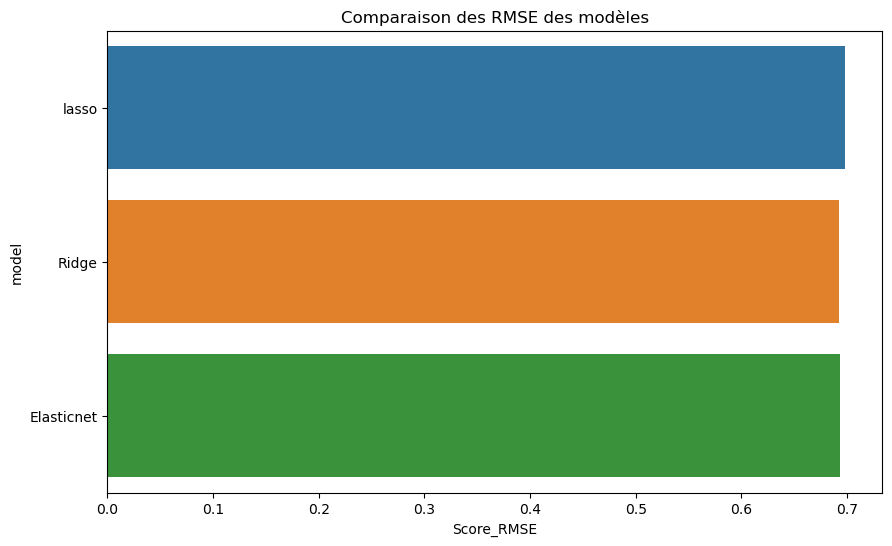

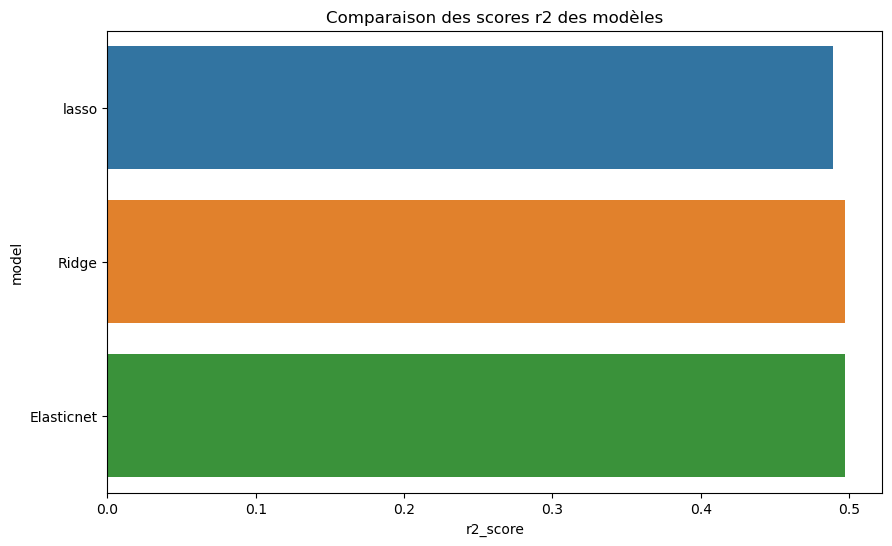

,model,Score_RMSE,r2_score,best_params
0,lasso,0.698528,0.488952,"{'lasso__alpha': 0.003359818286283781, 'lasso_..."
1,Ridge,0.692582,0.497616,{'ridge__alpha': 20.6913808111479}
2,Elasticnet,0.692895,0.497162,"{'el__alpha': 0.01, 'el__l1_ratio': 0.1, 'el__..."


In [21]:
find_best_model_using_gridsearchcv(X_train,y_train)

### Amélioration du feature engineering

In [22]:
data=table.copy()

In [23]:
#transformation log
for var in targets:
    data[var]=np.log1p(data[var])

In [24]:
data.columns.to_list()

['BuildingAge',
 'BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'SiteEnergyUseWN(kBtu)',
 'SiteEUIWN(kBtu/sf)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'ENERGYSTARScore',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'Surface',
 'energytype_count']

#### Choix de nouvelles variables

In [25]:
features= ['BuildingAge',
    'Surface',
 'energytype_count',
'PrimaryPropertyType',
'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'SiteEnergyUseWN(kBtu)']

In [26]:
data=data[features]

In [27]:
#séparation du jeu de données
X_train, y_train, X_test, y_test= separation(data)

### Pipeline preprocessing

Pour le nouveau preprocessing, créons une pipeline composée d'un Transformer log,  pour normaliser les variables numériques et d'un OneHotEncoder pour l'encodage des variables catégorielles.

In [28]:
numerical_features=make_column_selector(dtype_include=np.number)
categorical_features=make_column_selector(dtype_exclude=np.number)

In [29]:
categorical_pipeline = make_pipeline(OneHotEncoder(sparse= False,handle_unknown ='ignore'))
numerical_pipeline= make_pipeline(FunctionTransformer(np.log1p))

In [30]:
preprocessor = make_column_transformer((categorical_pipeline, categorical_features),(numerical_pipeline, numerical_features))

### Modélisation 

In [31]:
def model_selection(X_train, y_train, estimator):
    """
    Test various estimators.
    """
    model = Pipeline([
         ('preprocessor', preprocessor),
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X_train, y_train)  

    expected  = y_test
    predicted = model.predict(X_test)

    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return (("le score d'entrainement est de ", model.score(X_train, y_train)),
            
            ("le score r2","est de ", r2_score(expected, predicted)))

Testons les modèles linéaires suivants: 
  -  Ridge,
  -  Lasso, 
  -  ElasticNet,
  -  Random Forest Regressor,
  -  Support Vector Regressor,
  -  Decision Tree Regressor,
  -  Gradient Boosting


#### Ridge

In [32]:
model_selection(X_train, y_train, Ridge())

(("le score d'entrainement est de ", 0.28082731624482016),
 ('le score r2', 'est de ', 0.6192883606692507))

#### ElasticNet

In [33]:
model_selection(X_train, y_train,  ElasticNet())

(("le score d'entrainement est de ", 0.028185081943956525),
 ('le score r2', 'est de ', 0.0866128346894166))

#### Lasso

In [34]:
model_selection(X_train, y_train, Lasso())

(("le score d'entrainement est de ", 0.0),
 ('le score r2', 'est de ', -5.021928551873778e-05))

#### Random Forest Regressor

In [35]:
model_selection(X_train, y_train, RandomForestRegressor())

(("le score d'entrainement est de ", 0.877403266251779),
 ('le score r2', 'est de ', 0.30888817440290206))

#### Support Vector Regressor

In [36]:
model_selection(X_train, y_train, SVR())

(("le score d'entrainement est de ", 0.20227582141556544),
 ('le score r2', 'est de ', 0.5439955324555127))

#### Hyperparametres tuning

In [37]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        
        'lasso': {
            'model': Pipeline([
         ('preprocessor', preprocessor),
         ('lasso',Lasso())
    ]),
            'params': {
                'lasso__alpha': np.logspace(-5,1,20),
                'lasso__selection': ['random', 'cyclic']
            }
            },
        
        'Ridge': {
            'model': Pipeline([
         ('preprocessor', preprocessor),
         ('ridge',Ridge())
    ]),
            'params': {
                'ridge__alpha': np.logspace(-5,5,20),
            }
        },
        
        'Elasticnet': {
            'model': Pipeline([
         ('preprocessor', preprocessor),
         ('el',ElasticNet())
    ]),
            'params': {
                'el__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                'el__l1_ratio' :np.arange(0.0, 1.0, 0.1),
                'el__fit_intercept': [True, False]
                
                
            }
        },
        
        'Random Forest Regressor': {
            'model': Pipeline([
         ('preprocessor', preprocessor),
         ('rfr', RandomForestRegressor())
    ]),
            'params': {
                'rfr__n_estimators': [10,50,100,200,300],
                'rfr__max_features': ['log2','auto'],
                'rfr__min_samples_leaf' : [1,3,5,10],
                'rfr__bootstrap' : [True, False]
            }
        },
        
         'Support Vector Regressor': {
            'model': Pipeline([
         ('preprocessor', preprocessor),
         ('svr', SVR())
    ]),
            'params': {
                'svr__gamma' : [0.001,0.01, 0.1, 1],
                'svr__C' : [0.01, 0.1, 1, 10, 100],
                'svr__epsilon' : [ 0.01, 0.1, 1]
            }
        },
        
          'Decision Tree Regressor': {
            'model': Pipeline([
         ('preprocessor', preprocessor),
         ('dtr', DecisionTreeRegressor())
    ]),
            'params': {
                'dtr__max_features' : ['auto', 'sqrt'],
                'dtr__min_samples_leaf' : [7,8,9,10],
                
                "dtr__splitter":["best","random"]
            }
        },
        
        'Gradient Boosting': {
            'model': Pipeline([
         ('preprocessor', preprocessor),
         ('gbr', GradientBoostingRegressor())
    ]),
            'params': {
                'gbr__learning_rate' : [.001,0.01,.1],
          'gbr__n_estimators' : [1, 2, 5, 10, 20, 50],
            }
        }
        
    }
    scores = []
    
    cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], 
                           config['params'],
                           cv=cv,
                           scoring = 'neg_mean_squared_error',
                           verbose=1,
                           return_train_score=False)
        gs.fit(X,y)
        
        scores.append({
            'model': algo_name,
            'Score_RMSE' : np.sqrt(mse(y_test,gs.predict(X_test))),
            'r2_score': r2_score(y_test,gs.predict(X_test)),
            'best_params': gs.best_params_
        })
        
        results= pd.DataFrame(scores,columns=['model','Score_RMSE','r2_score','best_params'])
         
    plt.figure(figsize=(10,6))
    plt.title('Comparaison des RMSE des modèles')
    sns.barplot(y = results['model'],x= results['Score_RMSE'])
    plt.show()
        
    plt.figure(figsize=(10,6))
    plt.title('Comparaison des scores r2 des modèles')
    sns.barplot(y = results['model'],x= results['r2_score'])
    plt.show()
         
    return results
    
    

Fitting 20 folds for each of 40 candidates, totalling 800 fits
Fitting 20 folds for each of 20 candidates, totalling 400 fits
Fitting 20 folds for each of 100 candidates, totalling 2000 fits
Fitting 20 folds for each of 80 candidates, totalling 1600 fits
Fitting 20 folds for each of 60 candidates, totalling 1200 fits
Fitting 20 folds for each of 16 candidates, totalling 320 fits
Fitting 20 folds for each of 18 candidates, totalling 360 fits


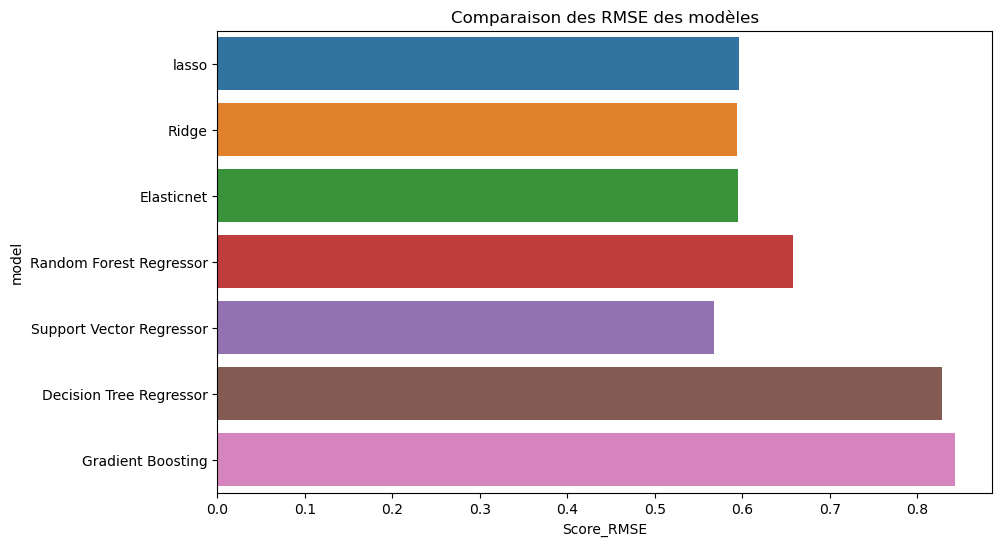

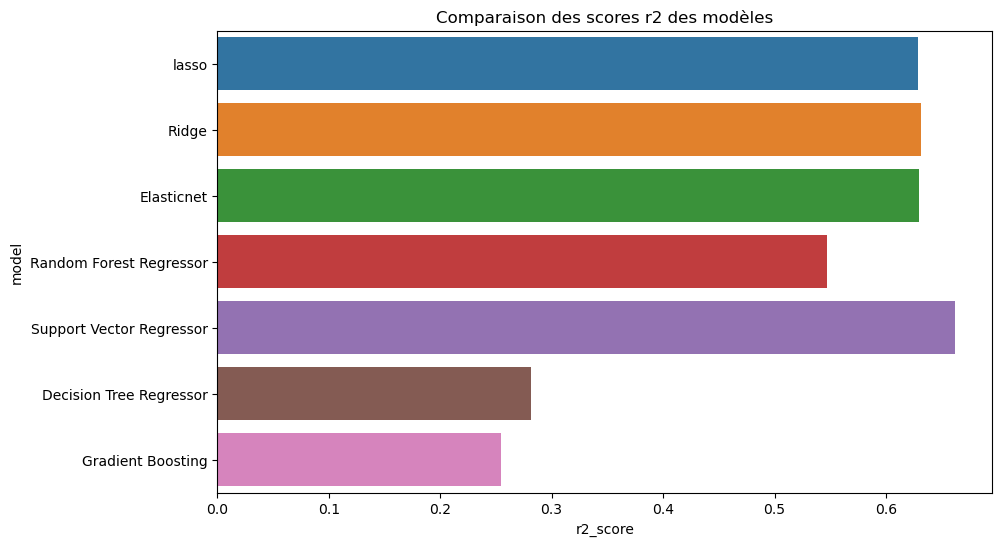

,model,Score_RMSE,r2_score,best_params
0,lasso,0.595615,0.628443,"{'lasso__alpha': 0.001623776739188721, 'lasso_..."
1,Ridge,0.593442,0.631149,{'ridge__alpha': 6.1584821106602545}
2,Elasticnet,0.594851,0.629395,"{'el__alpha': 0.01, 'el__fit_intercept': True,..."
3,Random Forest Regressor,0.657495,0.547228,"{'rfr__bootstrap': False, 'rfr__max_features':..."
4,Support Vector Regressor,0.567731,0.662418,"{'svr__C': 10, 'svr__epsilon': 0.1, 'svr__gamm..."
5,Decision Tree Regressor,0.828499,0.281085,"{'dtr__max_features': 'sqrt', 'dtr__min_sample..."
6,Gradient Boosting,0.843455,0.254894,"{'gbr__learning_rate': 0.1, 'gbr__n_estimators..."


In [38]:
find_best_model_using_gridsearchcv(X_train,y_train)

### Feature importance 

#### Feature importance gradient boosting regressor

In [39]:
# load JS visualization code to notebook
shap.initjs()

In [40]:
data=table.copy()

In [41]:
data=data[features]

In [42]:
def transformation_en_log(df):
    cont_feats = [col for col in df.columns if df[col].dtype != object]
    for var in cont_feats:
        df[var]=np.log1p(df[var])
    return df 

In [43]:
def encodage(df):
    cont_feats = [col for col in df.columns if df[col].dtype != object]
    cat_feats = [col for col in df.columns if col not in cont_feats]
    df_ohe=df[cat_feats]
    transformer =OneHotEncoder(sparse=False,handle_unknown='ignore')
    transformed = transformer.fit_transform(df_ohe)
    transformed_df = pd.DataFrame(transformed,columns=transformer.get_feature_names_out())
    df_num=df[cont_feats]
    df_encoded=pd.concat(objs=[df_num.reset_index(drop=True), transformed_df.reset_index(drop=True)],axis=1)
    return df_encoded

In [44]:
def preprocessing(df):
    df=transformation_en_log(df)
    df=encodage(df)
    X_train, y_train, X_test, y_test=separation(df)
    return X_train, y_train, X_test, y_test

In [45]:
X_train, y_train, X_test, y_test= preprocessing(data)

In [46]:
print(X_train.shape)
print(y_train.shape)

(989, 77)
(989,)


In [47]:
model_svr = SVR(C=10, epsilon=0.1, gamma=0.01)
model_svr.fit(X_train, y_train)
model_svr.score(X_test, y_test)

0.6624359217320983

#### Feature importance SVR

In [48]:
explainer= shap.KernelExplainer(model_svr.predict,X_test)
shap_values = explainer.shap_values(X_test, nsamples=200)

Using 109 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/109 [00:00<?, ?it/s]

##### Summary plot

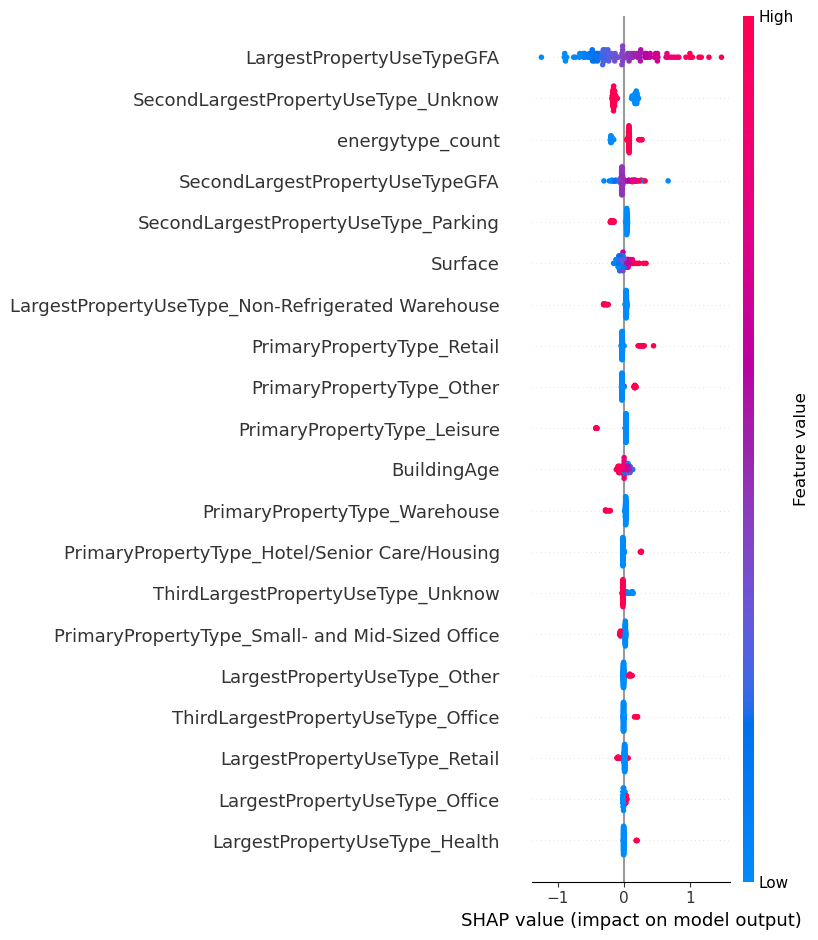

In [49]:
shap.summary_plot(shap_values, X_test)

##### Summary barplot

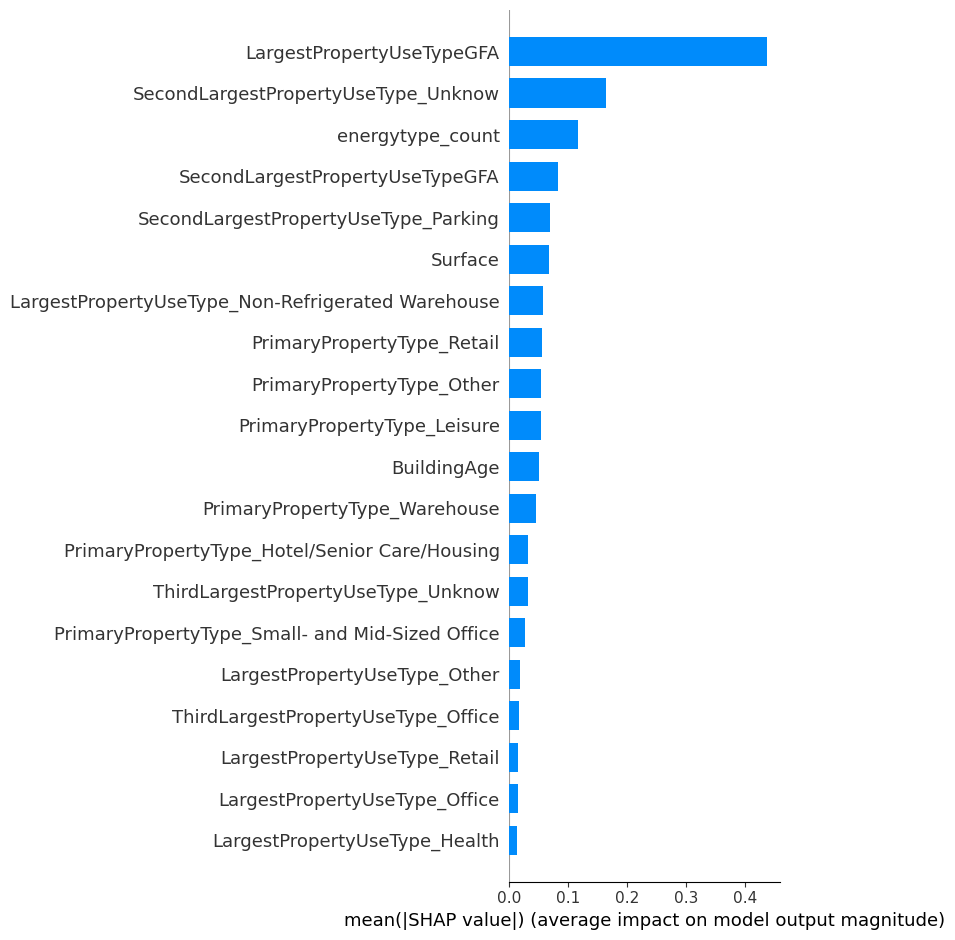

In [50]:
shap.summary_plot(shap_values, X_test,plot_type='bar')

##### Force plot

Prenons un bâtiment au hasard dans le test pour comprendre les perdictions du modèle.

In [51]:
i = 4
shap.force_plot(explainer.expected_value, shap_values[i], features=X_test.iloc[i])

Force plot de l'ensemble des prédictions

In [52]:
shap.force_plot(explainer.expected_value, shap_values, features=X_test)

##### Dependence plot 

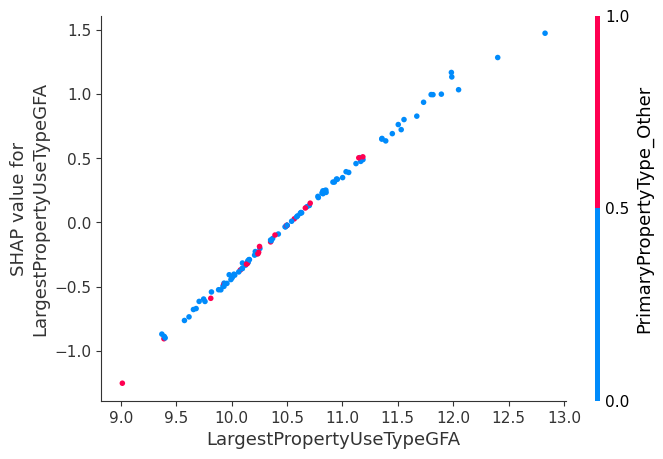

In [53]:
shap.dependence_plot('LargestPropertyUseTypeGFA', shap_values, X_test)

## L’influence de l’EnergyStarScore

In [54]:
df_en=table

#### Simulation du modèle SVR avec la variable 'ENERGYSTARScore'

In [55]:
variables= ['BuildingAge',
    'Surface',
 'energytype_count',
    'PrimaryPropertyType',
    'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
  'ENERGYSTARScore',
 'SiteEnergyUseWN(kBtu)']

In [56]:
#sélection des variables 
df_en=df_en[variables]

In [57]:
#Suppression des lignes qui comprennent des valeurs manquantes de la variable 'ENERGYSTARScore' 
df_en=df_en.dropna(subset=['ENERGYSTARScore',])

In [58]:
#separation + preprocessing du dataset
X_train_en, y_train_en,X_test_en, y_test_en= preprocessing(df_en)

In [59]:
#Modélisation 
model_svr_en = SVR(C=10, epsilon=0.1, gamma=0.01)
model_svr_en.fit(X_train_en, y_train_en)
print(model_svr_en.score(X_test_en, y_test_en))

0.7826089809626751


#### Feature importance 

In [60]:
svr_explainer= shap.KernelExplainer(model_svr_en.predict,X_test_en)
svr_shap_values =svr_explainer.shap_values(X_test_en,nsamples=100 )

  0%|          | 0/68 [00:00<?, ?it/s]

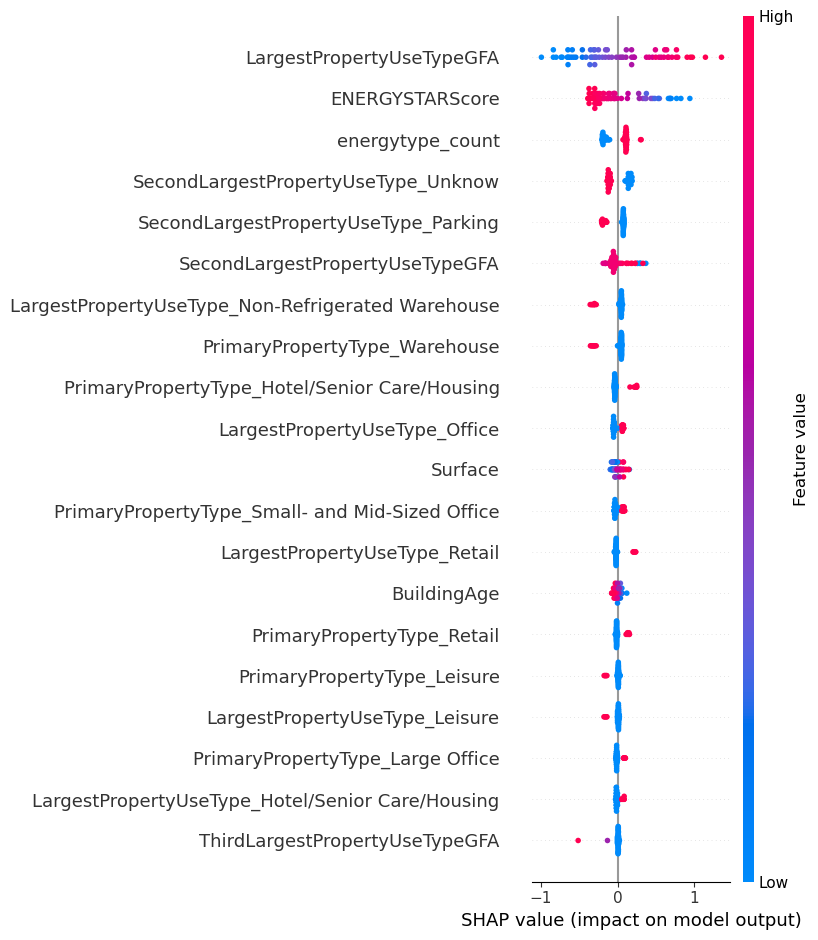

In [61]:
shap.summary_plot(svr_shap_values, X_test_en)

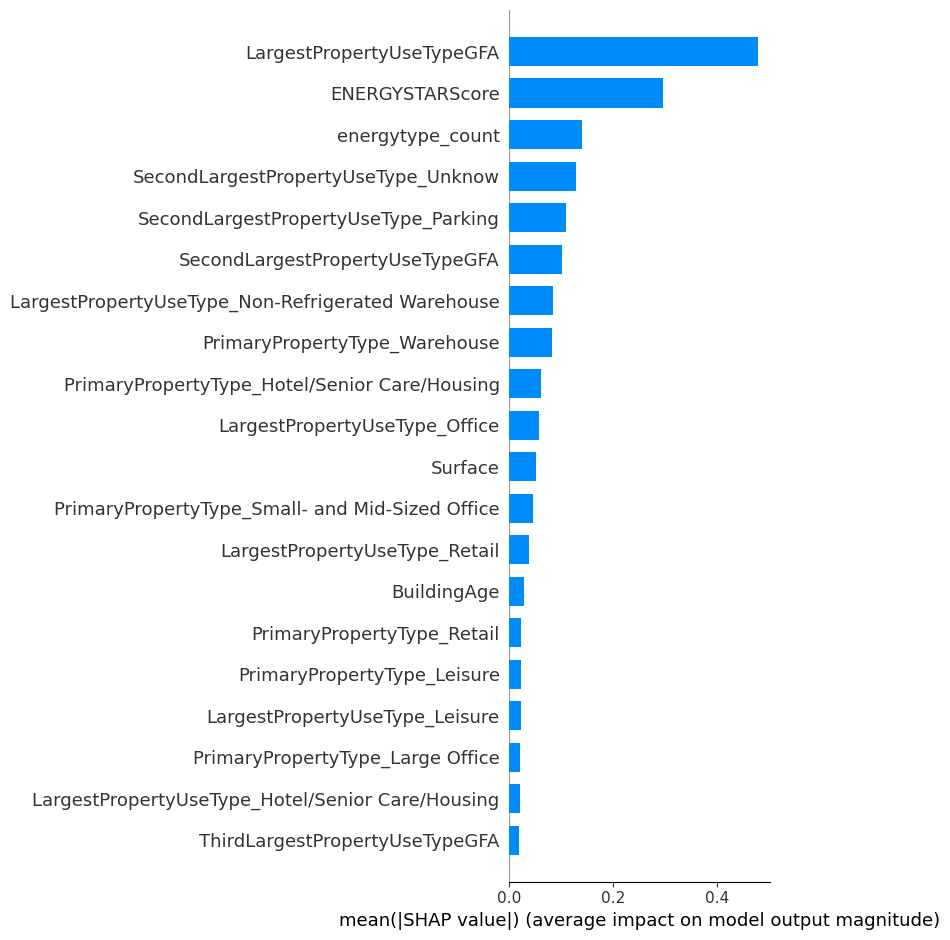

In [62]:
shap.summary_plot(svr_shap_values, X_test_en,plot_type='bar')

In [63]:
i = 1
shap.force_plot(svr_explainer.expected_value, svr_shap_values[i], features=X_test_en.iloc[i])

In [64]:
shap.force_plot(svr_explainer.expected_value, svr_shap_values, features=X_test_en )

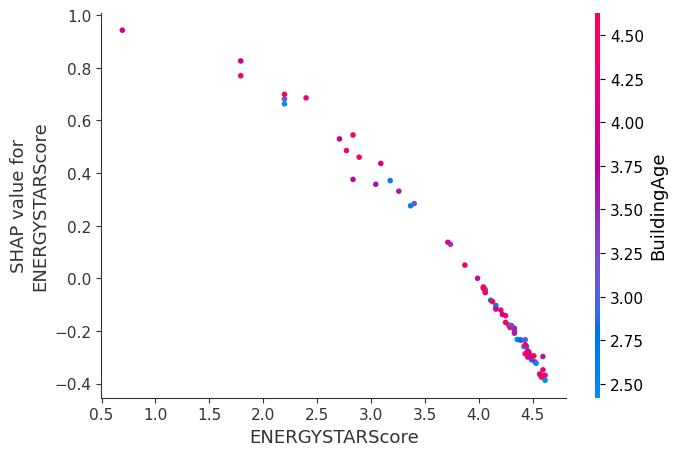

In [65]:
shap.dependence_plot('ENERGYSTARScore', svr_shap_values, X_test_en)

### Entrainement sans la variable 'ENERGYSTARScore'

In [66]:
df_en=table
df_en=df_en[variables]
df_en=df_en.dropna(subset=['ENERGYSTARScore',])
df_en=df_en.drop('ENERGYSTARScore',axis=1)

In [67]:
#preprocessing 
#separation du dataset
X_train_en, y_train_en,X_test_en, y_test_en= preprocessing(df_en)

In [68]:
#Modélisation sans 'ENERGYSTARScore'
model_svr_en = SVR(C=10, epsilon=0.1, gamma=0.01)
model_svr_en.fit(X_train_en, y_train_en)
print(model_svr_en.score(X_test_en, y_test_en))

0.6992541688535057
